In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [32]:
IOE_logs = pd.read_csv('/kaggle/input/ioed-net-internet-of-educational-things-dataset/IoEd-Net.csv')
print(f"number of features: {len(IOE_logs.columns)}")
print(f"features: {(IOE_logs.columns)}")
IOE_logs.describe()

number of features: 59
features: Index(['Source_IP', 'Destination_IP', 'Source_Port', 'Destination_Port',
       'Protocol', 'Packet_Size', 'Packet_Count', 'Flow_Duration',
       'Packet_Interarrival_Time', 'TCP_Flags', 'Bytes_Sent', 'Bytes_Received',
       'Traffic_Direction', 'Connection_State', 'Packet_Drop_Rate',
       'Malformed_Packet_Count', 'Avg_Time_Between_Packets',
       'Total_Flow_Count', 'Device_Type', 'Device_Manufacturer', 'OS_Version',
       'CPU_Usage', 'Memory_Usage_MB', 'Energy_Consumption_Watts',
       'Firmware_Version', 'Device_Uptime_Hours', 'Payload_Size_Bytes',
       'Payload_Entropy', 'Payload_Content_Type', 'Signature_Match',
       'Compressed_Encrypted_Flag', 'Content_Type_File_Transferred',
       'Flow_Count_Per_Time_Window', 'Avg_Packet_Size_Bytes',
       'Packet_Rate_Packets_Per_Second', 'Std_Dev_Packet_Size',
       'Min_Packet_Size', 'Max_Packet_Size',
       'Protocol_Distribution_TCP_Percent',
       'Protocol_Distribution_UDP_Percent',
   

,Source_Port,Destination_Port,Packet_Size,Packet_Count,Flow_Duration,Packet_Interarrival_Time,Bytes_Sent,Bytes_Received,Packet_Drop_Rate,Malformed_Packet_Count,...,Source_Geolocation_Longitude,Destination_Geolocation_Latitude,Destination_Geolocation_Longitude,DNS_Query_Count,Suspicious_Domain_Query_Flag,File_Transfer_Occurred,File_Size_Bytes,Anomalous_Behavior_Flag,External_IP_Accessed_Flag,Label
count,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,2.020850e+05,202085.000000,...,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000,202085.000000
mean,33342.587614,33324.775317,1506.395253,498.406857,99.875980,49.930018,9970.023420,9998.095202,4.993867e-02,2.005523,...,-0.143797,-0.032325,-0.305991,5.001124,0.398337,0.298716,5008.946700,0.700408,0.800960,0.400777
std,18614.395630,18647.659672,1508.338248,499.213497,99.877719,50.094888,9977.236492,10001.343451,4.971334e-02,2.005511,...,103.973720,51.990061,103.902745,4.991194,0.489557,0.457696,5004.933055,0.458080,0.399279,0.490057
min,1000.000000,1000.000000,0.001249,0.000253,0.000323,0.000019,0.070970,0.068823,6.660824e-07,0.000010,...,-179.998264,-89.999562,-179.998472,0.000040,0.000000,0.000000,0.009890,0.000000,0.000000,0.000000
25%,17253.000000,17189.000000,431.939001,143.241250,28.861838,14.381854,2862.605162,2871.076953,1.433458e-02,0.577810,...,-90.228125,-45.131221,-90.374427,1.448636,0.000000,0.000000,1448.574743,0.000000,1.000000,0.000000
50%,33354.000000,33292.000000,1046.494581,344.344266,69.216906,34.497333,6925.725737,6931.296532,3.473039e-02,1.395733,...,-0.150841,-0.012453,-0.193936,3.472416,0.000000,0.000000,3477.249372,1.000000,1.000000,0.000000
75%,49442.000000,49488.000000,2085.859827,690.424426,138.321988,69.204375,13773.978923,13882.293756,6.934756e-02,2.778955,...,89.958519,44.825004,89.651915,6.934236,1.000000,1.000000,6930.815918,1.000000,1.000000,1.000000
max,65534.000000,65534.000000,17470.356494,6509.275399,1119.689244,714.858410,123531.876225,130673.606297,5.804205e-01,22.658129,...,179.999367,89.999503,179.999346,58.514021,1.000000,1.000000,63238.840733,1.000000,1.000000,1.000000


In [33]:
label_counts = IOE_logs['Label'].value_counts()
print(label_counts)
IOE_logs.isna().sum()

Label
0    121094
1     80991
Name: count, dtype: int64


Source_IP                                  0
Destination_IP                             0
Source_Port                                0
Destination_Port                           0
Protocol                                   0
Packet_Size                                0
Packet_Count                               0
Flow_Duration                              0
Packet_Interarrival_Time                   0
TCP_Flags                                  0
Bytes_Sent                                 0
Bytes_Received                             0
Traffic_Direction                          0
Connection_State                           0
Packet_Drop_Rate                           0
Malformed_Packet_Count                     0
Avg_Time_Between_Packets                   0
Total_Flow_Count                           0
Device_Type                                0
Device_Manufacturer                        0
OS_Version                                 0
CPU_Usage                                  0
Memory_Usa

In [34]:
droplist = ['Malware_Type', 'Attack_Vector', 'Anomalous_Behavior_Flag']
IOE_logs = IOE_logs.drop(columns=[col for col in droplist if col in IOE_logs.columns])

Some of the features directly tell models if the sample is malware so I drop them as well (such as malware type attack_vector). Not sure if I should remove the features Suspicious_Domain_Query_Flag, and Anomalous_Behavior_Flag

In [35]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
categorical_cols = IOE_logs.select_dtypes(include=['object', 'string']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    IOE_logs[col] = IOE_logs[col].fillna("Unknown")
    IOE_logs[col] = le.fit_transform(IOE_logs[col])
    label_encoders[col] = le

In [36]:
from sklearn.model_selection import train_test_split

X = IOE_logs.drop(columns=['Label'])
y = IOE_logs['Label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest Accuracy: 59.215518094546894
Random Forest F1 Score: 6.482602118003025
Random Forest execution time:  239.39976239204407 secs


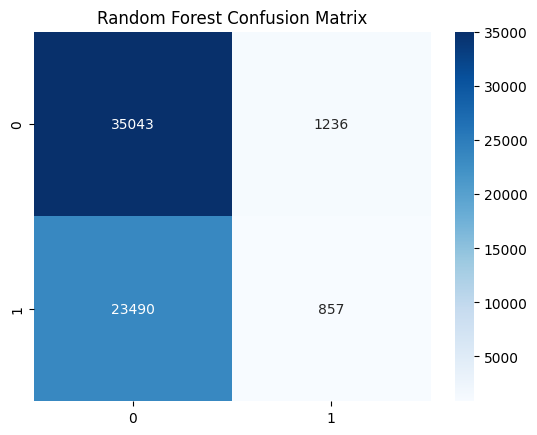

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import time

start_time = time.time()

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)

end_time = time.time()

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds)*100)
print("Random Forest F1 Score:", f1_score(y_test, rf_preds)*100)
print("Random Forest execution time: ", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


Naive Bayes Accuracy: 59.78787978754989
Naive Bayes F1 Score: 0.5628747399763429
Naive Bayes execution time: 0.19104695320129395 secs


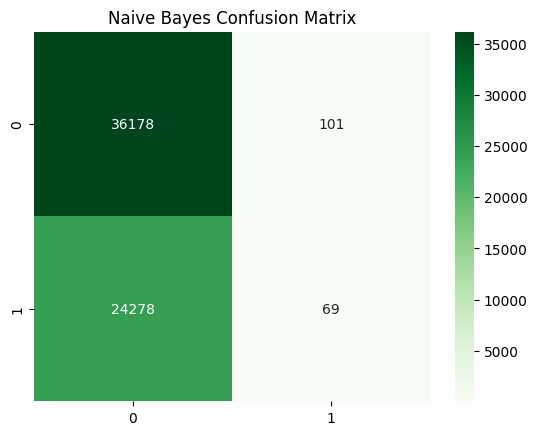

In [38]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_preds = nb.predict(x_test)

end_time = time.time()

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds)*100)
print("Naive Bayes F1 Score:", f1_score(y_test, nb_preds)*100)
print("Naive Bayes execution time:", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.show()


GMM Accuracy: 59.84066242206314
GMM F1 Score: 0.0
GMM execution time:  9.828631401062012 secs


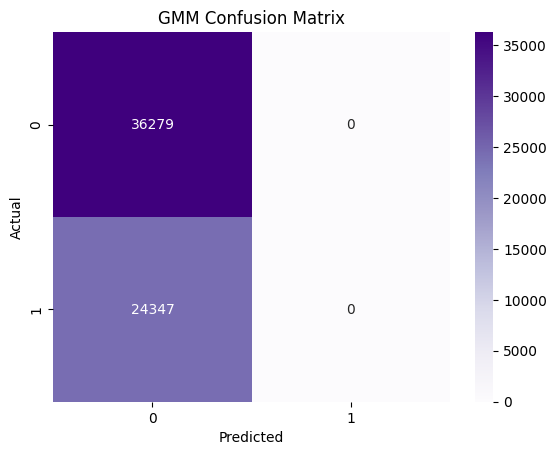

In [39]:
from sklearn.mixture import GaussianMixture
from scipy.stats import mode
import numpy as np

start_time = time.time()

gmm_model = GaussianMixture(n_components=2, random_state=42)
gmm_model.fit(x_train)

# Predict clusters
train_clusters = gmm_model.predict(x_train)
test_clusters = gmm_model.predict(x_test)

# Map clusters to class labels
mapping = {}
for cluster_id in np.unique(train_clusters):
    label = mode(y_train[train_clusters == cluster_id], keepdims=True).mode[0]
    mapping[cluster_id] = label

gmm_preds = np.vectorize(mapping.get)(test_clusters)

end_time = time.time()

print("GMM Accuracy:", accuracy_score(y_test, gmm_preds)*100)
print("GMM F1 Score:", f1_score(y_test, gmm_preds)*100)
print("GMM execution time: ", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, gmm_preds), annot=True, fmt="d", cmap="Purples")
plt.title("GMM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


F1 scores are really bad. Models are just predicting not malware and getting around 50% accuracy.

In [40]:
class_0 = IOE_logs[IOE_logs['Label'] == 0]
class_1 = IOE_logs[IOE_logs['Label'] == 1]

# get the smaller class size
min_size = min(len(class_0), len(class_1))

# bring both to the same size
class_0_balanced = class_0.sample(n=min_size, random_state=42)
class_1_balanced = class_1.sample(n=min_size, random_state=42)

# combine them into a dataset
balanced_data = pd.concat([class_0_balanced, class_1_balanced])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data['Label'].value_counts())

Label
0    80991
1    80991
Name: count, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split

X = balanced_data.drop(columns=['Label'])
y = balanced_data['Label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest Accuracy: 49.871385945056076
Random Forest F1 Score: 48.05527123848516
Random Forest execution time:  179.43817949295044 secs


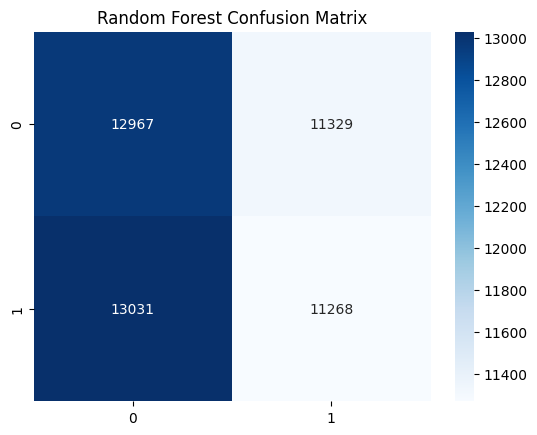

In [42]:
start_time = time.time()

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)

end_time = time.time()

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds)*100)
print("Random Forest F1 Score:", f1_score(y_test, rf_preds)*100)
print("Random Forest execution time: ", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


Naive Bayes Accuracy: 49.77055252598004
Naive Bayes F1 Score: 52.115743011280045
Naive Bayes execution time: 0.15965533256530762 secs


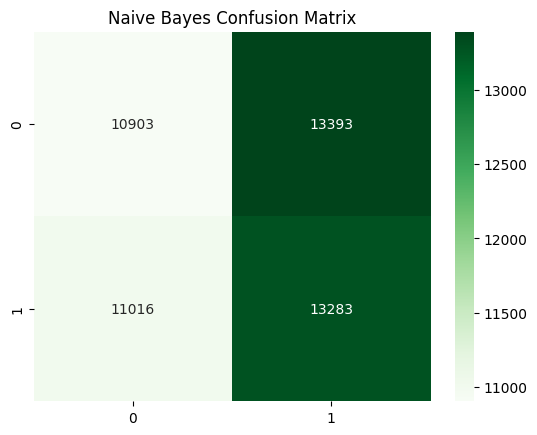

In [43]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_preds = nb.predict(x_test)

end_time = time.time()

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds)*100)
print("Naive Bayes F1 Score:", f1_score(y_test, nb_preds)*100)
print("Naive Bayes execution time:", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.show()


GMM Accuracy: 50.04424323490071
GMM F1 Score: 51.957253116960224
GMM execution time:  8.629514694213867 secs


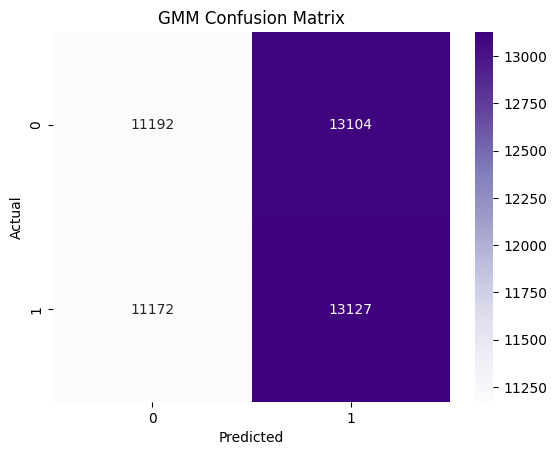

In [44]:
from sklearn.mixture import GaussianMixture
from scipy.stats import mode
import numpy as np

start_time = time.time()

gmm_model = GaussianMixture(n_components=2, random_state=42)
gmm_model.fit(x_train)

# Predict clusters
train_clusters = gmm_model.predict(x_train)
test_clusters = gmm_model.predict(x_test)

# Map clusters to class labels
mapping = {}
for cluster_id in np.unique(train_clusters):
    label = mode(y_train[train_clusters == cluster_id], keepdims=True).mode[0]
    mapping[cluster_id] = label

gmm_preds = np.vectorize(mapping.get)(test_clusters)

end_time = time.time()

print("GMM Accuracy:", accuracy_score(y_test, gmm_preds)*100)
print("GMM F1 Score:", f1_score(y_test, gmm_preds)*100)
print("GMM execution time: ", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, gmm_preds), annot=True, fmt="d", cmap="Purples")
plt.title("GMM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
